In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
import pickle
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows',500)

## Set up dataframe

In [304]:
with open('game_log_list.pickle', 'rb') as infile:
    games = pickle.load(infile)
infile.close()

In [305]:
games_df = pd.DataFrame(games, columns = games[0].keys())

In [306]:
#saving df as json file
games_df.to_json('game_log_df.json')

In [384]:
df = games_df

df = df.sort_index()

In [385]:
df['gm_szn_type']=[type(i) for i in df.game_season]

In [386]:
df = df[df.gm_szn_type != type(None)].drop('gm_szn_type',axis=1)

In [387]:
df.shape

(41964, 31)

In [388]:
# loop through each column and convert all numerical data from string to int/float
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except:
        pass

In [389]:
df.date_game = pd.to_datetime(df.date_game)

In [390]:
df['home'] = df.game_location.replace(['@',''],[0,1])

In [391]:
df = df[['player_id','player', 'game_season', 'date_game', 'age', 'home', 'team_id',
 'opp_id', 'game_result', 'gs', 'mp', 'fg', 'fga', 'fg_pct', 'fg3',
 'fg3a', 'fg3_pct', 'ft', 'fta', 'ft_pct', 'orb', 'drb', 'trb', 'ast',
 'stl', 'blk', 'tov', 'pf', 'pts', 'game_score', 'plus_minus']]

In [392]:
df = df.sort_values(by=['player', 'date_game'])

In [393]:
df = df.reset_index().drop('index',axis=1)

In [394]:
df = pd.get_dummies(df,columns=['opp_id'])

In [396]:
df.head()

,player_id,player,game_season,date_game,age,home,team_id,game_result,gs,mp,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,fta,ft_pct,orb,drb,trb,ast,stl,blk,tov,pf,pts,game_score,plus_minus,opp_id_ATL,opp_id_BOS,opp_id_BRK,opp_id_CHI,opp_id_CHO,opp_id_CLE,opp_id_DAL,opp_id_DEN,opp_id_DET,opp_id_GSW,opp_id_HOU,opp_id_IND,opp_id_LAC,opp_id_LAL,opp_id_MEM,opp_id_MIA,opp_id_MIL,opp_id_MIN,opp_id_NOP,opp_id_NYK,opp_id_OKC,opp_id_ORL,opp_id_PHI,opp_id_PHO,opp_id_POR,opp_id_SAC,opp_id_SAS,opp_id_TOR,opp_id_UTA,opp_id_WAS
0,gordoaa01,Aaron Gordon,1.0,2018-10-17,23-031,1.0,ORL,W (+3),1.0,38:18,9.0,18.0,0.500,4.0,5.0,0.8,4.0,6.0,0.667,4.0,12.0,16.0,2.0,0.0,0.0,4.0,3.0,26.0,18.8,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,gordoaa01,Aaron Gordon,2.0,2018-10-19,23-033,1.0,ORL,L (-32),1.0,24:54,2.0,9.0,0.222,0.0,4.0,0.0,1.0,1.0,1.000,3.0,7.0,10.0,2.0,2.0,2.0,3.0,2.0,5.0,4.7,-5.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,gordoaa01,Aaron Gordon,3.0,2018-10-20,23-034,0.0,ORL,L (-1),1.0,32:07,7.0,12.0,0.583,0.0,1.0,0.0,6.0,9.0,0.667,4.0,8.0,12.0,3.0,1.0,3.0,4.0,3.0,20.0,18.4,12.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,gordoaa01,Aaron Gordon,4.0,2018-10-22,23-036,0.0,ORL,W (+3),1.0,38:35,5.0,11.0,0.455,2.0,5.0,0.4,1.0,2.0,0.500,0.0,3.0,3.0,3.0,0.0,0.0,2.0,2.0,13.0,7.1,-7.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,gordoaa01,Aaron Gordon,5.0,2018-10-25,23-039,1.0,ORL,L (-14),1.0,28:25,6.0,11.0,0.545,2.0,5.0,0.4,3.0,6.0,0.500,1.0,3.0,4.0,2.0,0.0,1.0,2.0,3.0,17.0,11.0,-6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


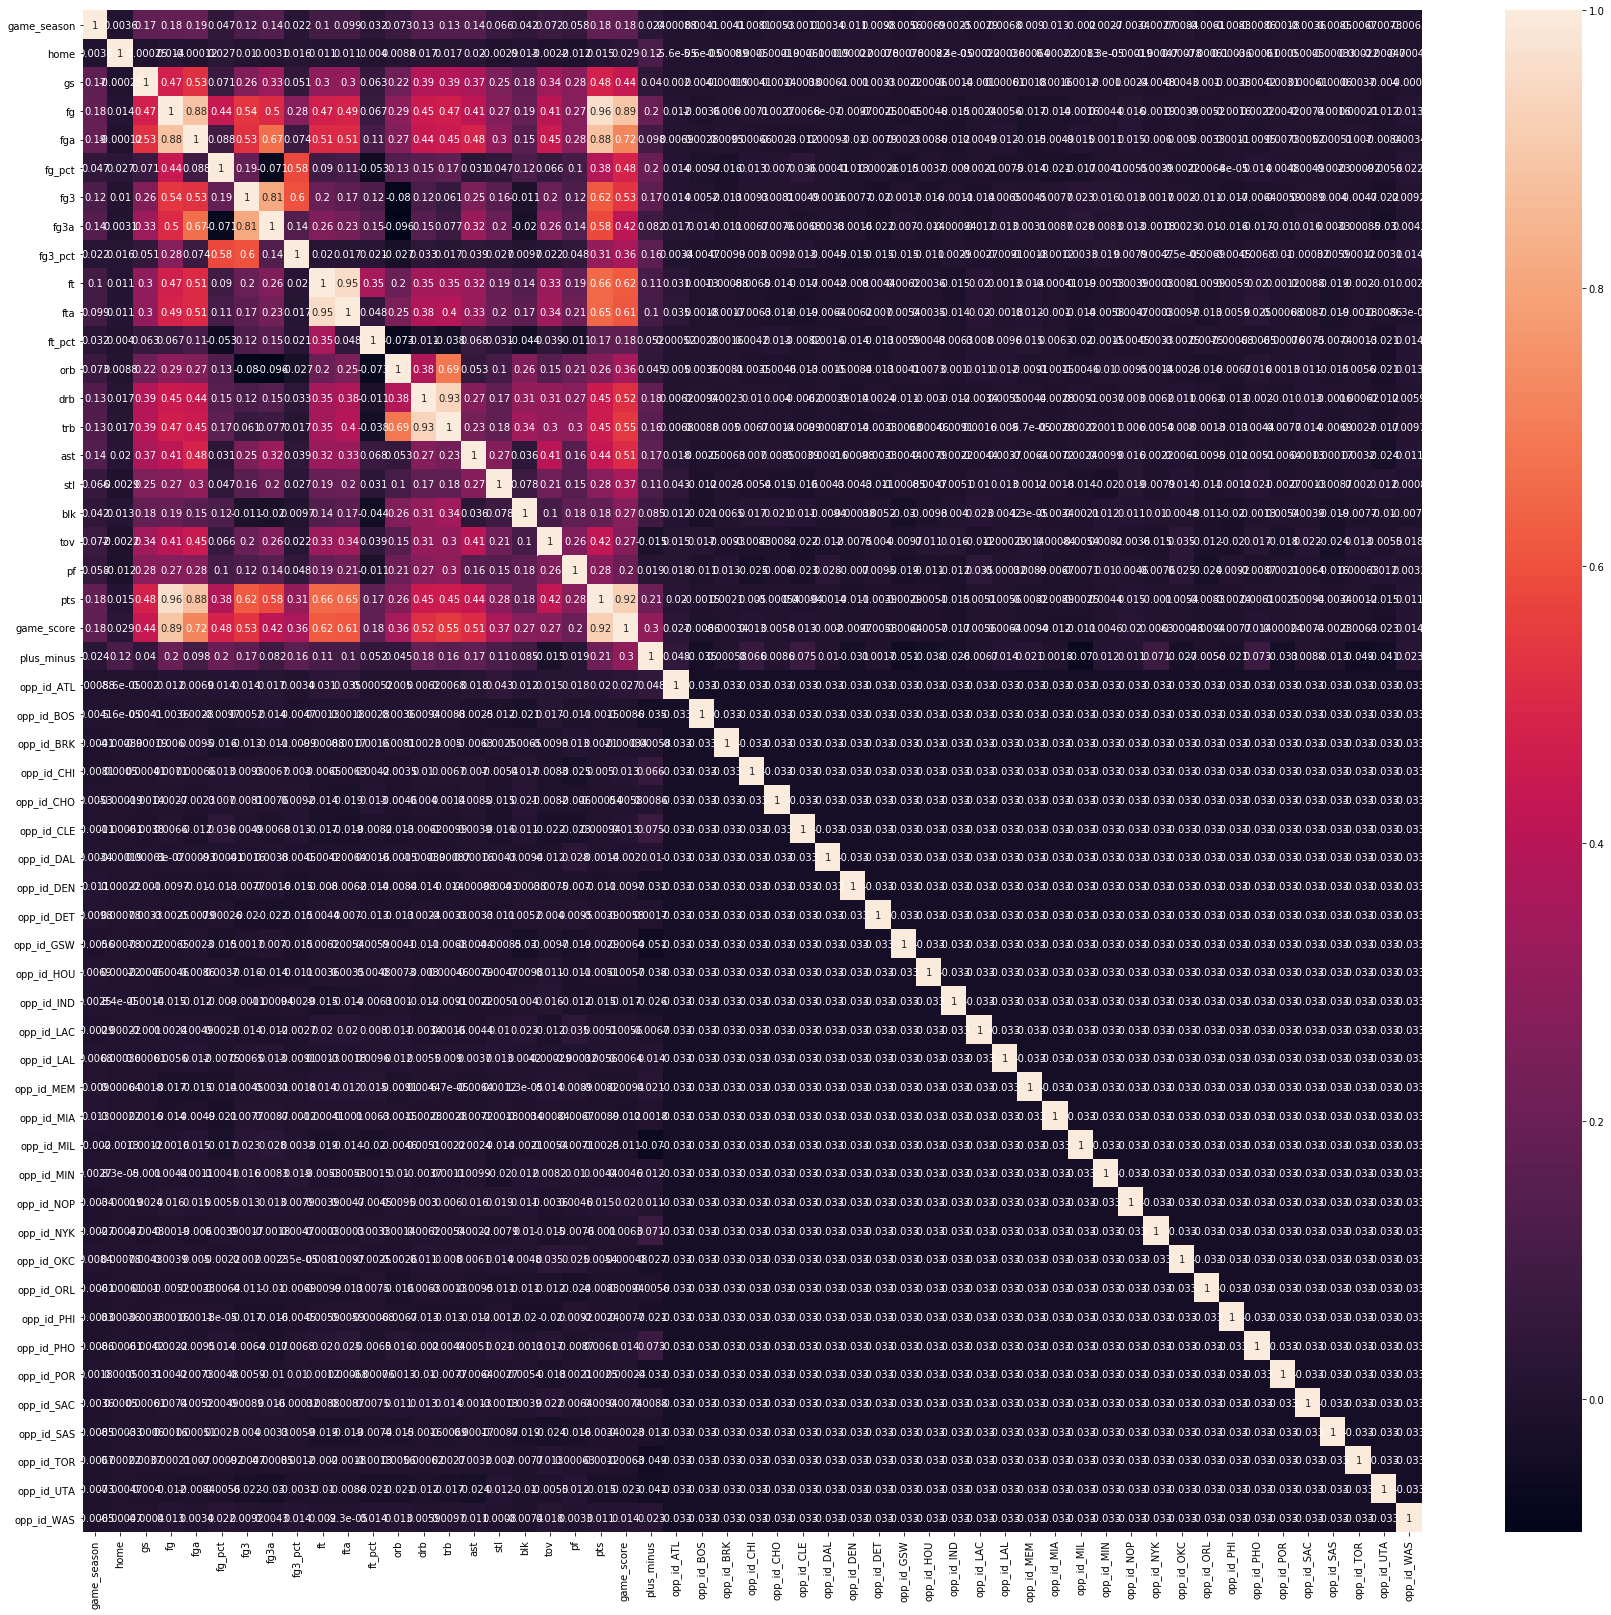

In [395]:
plt.figure(figsize=(30,28))
sns.heatmap(df.corr(), annot=True)

In [237]:
# back to back games ?

In [282]:
# source: https://help.yahoo.com/kb/fantasy-basketball/default-league-settings-fantasy-basketball-sln6919.html
yahoo_scoring = dict(pts = 1,
                     reb = 1.2,
                     asst = 1.5,
                     blk = 3,
                     stl = 3,
                     turnover = -1)

In [278]:
(22)+(3*1.2)+(9*1.5)+(0)+(3*3)-(5)

43.1

In [363]:
positions = pickle.load(open('player_positions.pickle','rb'))

In [368]:
pos_df = pd.DataFrame(positions, index=[0]).T

In [373]:
pos_df = pos_df.reset_index()

In [374]:
pos_df.columns = ['player','position']

In [411]:
df.merge(pos_df, how='left', on='player')

,player_id,player,game_season,date_game,age,home,team_id,game_result,gs,mp,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,fta,ft_pct,orb,drb,trb,ast,stl,blk,tov,pf,pts,game_score,plus_minus,opp_id_ATL,opp_id_BOS,opp_id_BRK,opp_id_CHI,opp_id_CHO,opp_id_CLE,opp_id_DAL,opp_id_DEN,opp_id_DET,opp_id_GSW,opp_id_HOU,opp_id_IND,opp_id_LAC,opp_id_LAL,opp_id_MEM,opp_id_MIA,opp_id_MIL,opp_id_MIN,opp_id_NOP,opp_id_NYK,opp_id_OKC,opp_id_ORL,opp_id_PHI,opp_id_PHO,opp_id_POR,opp_id_SAC,opp_id_SAS,opp_id_TOR,opp_id_UTA,opp_id_WAS,position
0,gordoaa01,Aaron Gordon,1.0,2018-10-17,23-031,1.0,ORL,W (+3),1.0,38:18,9.0,18.0,0.500,4.0,5.0,0.800,4.0,6.0,0.667,4.0,12.0,16.0,2.0,0.0,0.0,4.0,3.0,26.0,18.8,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,PF
1,gordoaa01,Aaron Gordon,2.0,2018-10-19,23-033,1.0,ORL,L (-32),1.0,24:54,2.0,9.0,0.222,0.0,4.0,0.000,1.0,1.0,1.000,3.0,7.0,10.0,2.0,2.0,2.0,3.0,2.0,5.0,4.7,-5.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,PF
2,gordoaa01,Aaron Gordon,3.0,2018-10-20,23-034,0.0,ORL,L (-1),1.0,32:07,7.0,12.0,0.583,0.0,1.0,0.000,6.0,9.0,0.667,4.0,8.0,12.0,3.0,1.0,3.0,4.0,3.0,20.0,18.4,12.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,PF
3,gordoaa01,Aaron Gordon,4.0,2018-10-22,23-036,0.0,ORL,W (+3),1.0,38:35,5.0,11.0,0.455,2.0,5.0,0.400,1.0,2.0,0.500,0.0,3.0,3.0,3.0,0.0,0.0,2.0,2.0,13.0,7.1,-7.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,PF
4,gordoaa01,Aaron Gordon,5.0,2018-10-25,23-039,1.0,ORL,L (-14),1.0,28:25,6.0,11.0,0.545,2.0,5.0,0.400,3.0,6.0,0.500,1.0,3.0,4.0,2.0,0.0,1.0,2.0,3.0,17.0,11.0,-6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,PF
5,gordoaa01,Aaron Gordon,6.0,2018-10-27,23-041,0.0,ORL,L (-22),1.0,30:45,3.0,15.0,0.200,0.0,6.0,0.000,3.0,4.0,0.750,2.0,3.0,5.0,2.0,1.0,0.0,1.0,5.0,9.0,1.0,-15.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,PF
6,gordoaa01,Aaron Gordon,7.0,2018-10-30,23-044,1.0,ORL,L (-8),1.0,34:21,7.0,15.0,0.467,2.0,7.0,0.286,2.0,4.0,0.500,2.0,8.0,10.0,3.0,2.0,2.0,2.0,3.0,18.0,15.6,-6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,PF
7,gordoaa01,Aaron Gordon,8.0,2018-11-02,23-047,1.0,ORL,L (-25),1.0,23:34,2.0,5.0,0.400,0.0,0.0,NaN,0.0,0.0,NaN,0.0,3.0,3.0,0.0,1.0,0.0,1.0,2.0,4.0,1.4,-9.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,PF
8,gordoaa01,Aaron Gordon,9.0,2018-11-04,23-049,0.0,ORL,W (+7),1.0,41:13,11.0,20.0,0.550,4.0,10.0,0.400,0.0,0.0,NaN,2.0,6.0,8.0,0.0,1.0,0.0,1.0,3.0,26.0,18.4,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,PF
9,gordoaa01,Aaron Gordon,10.0,2018-11-05,23-050,1.0,ORL,W (+2),1.0,33:27,9.0,15.0,0.600,3.0,4.0,0.750,2.0,2.0,1.000,4.0,5.0,9.0,3.0,0.0,0.0,1.0,3.0,23.0,20.3,3.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,PF
